In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2023-03-26 03:45:42.610914: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape
len(train_labels)

60000

In [6]:
train_labels.shape

(60000,)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

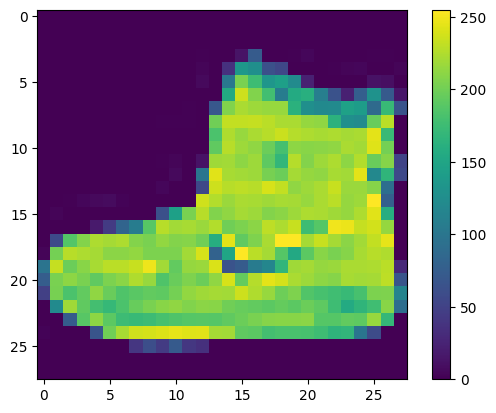

In [11]:
plt.figure
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

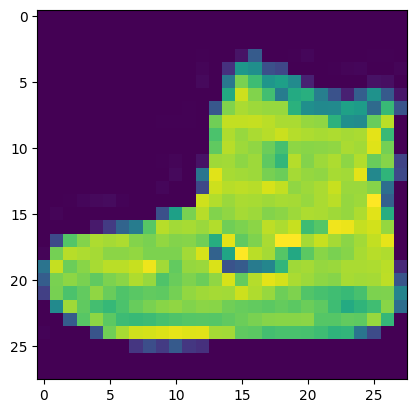

In [12]:
plt.figure
plt.imshow(train_images[0])

In [13]:
plt.figure
plt.show()

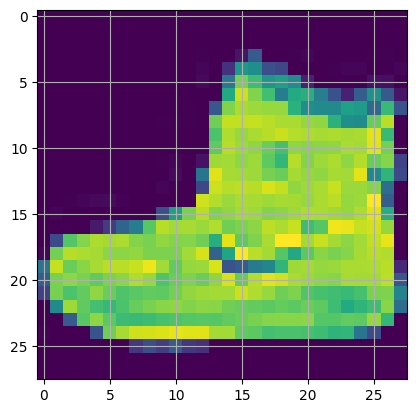

In [14]:
plt.figure
plt.imshow(train_images[0])
plt.grid(True)
plt.show()

TypeError: Invalid shape (2, 28, 28) for image data

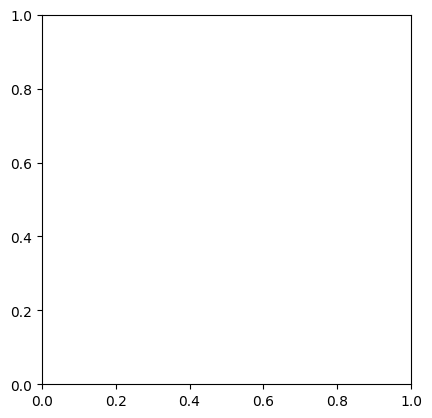

In [15]:
plt.figure
plt.imshow(train_images[:2])
plt.show()

In [16]:
train_images, test_images = train_images / 255.0, test_images / 255.0

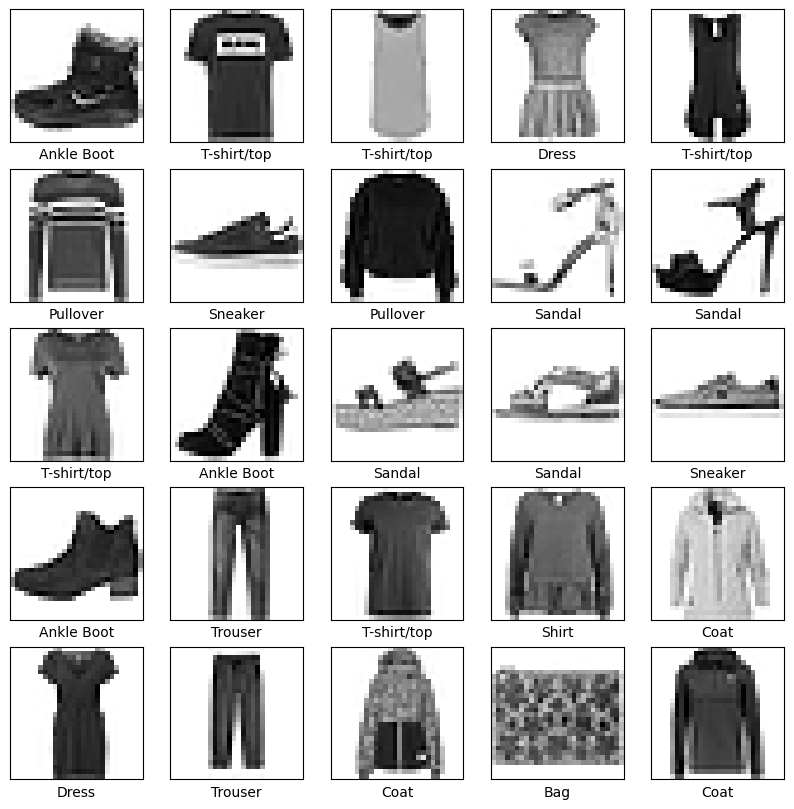

In [53]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4964 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3737 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3335 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3098 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2907 - accuracy: 0.8936
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2770 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2647 - accuracy: 0.9021
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2553 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2438 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.235

In [57]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.3376 - accuracy: 0.8850 - 294ms/epoch - 938us/step

Test accuracy:  0.8849999904632568


In [58]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 668us/step


In [59]:
predictions[0]

array([3.5253191e-08, 5.8035716e-12, 1.1651773e-08, 7.9374578e-09,
       2.1501034e-11, 4.9918377e-05, 3.0010664e-08, 2.9024230e-03,
       1.5049947e-07, 9.9704748e-01], dtype=float32)

In [60]:
np.argmax(predictions[0])

9

In [61]:
test_labels[0]

9

In [78]:
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                          100*np.max(predictions_array), 
                                          class_names[true_label]),
                                          color=color)

def plot_value_array(i, predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

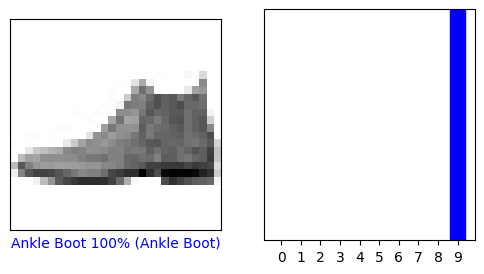

In [79]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels[i])
plt.show()

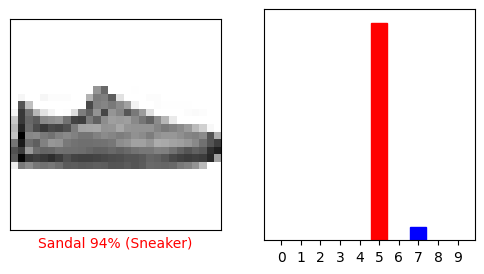

In [80]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels[i])
plt.show()

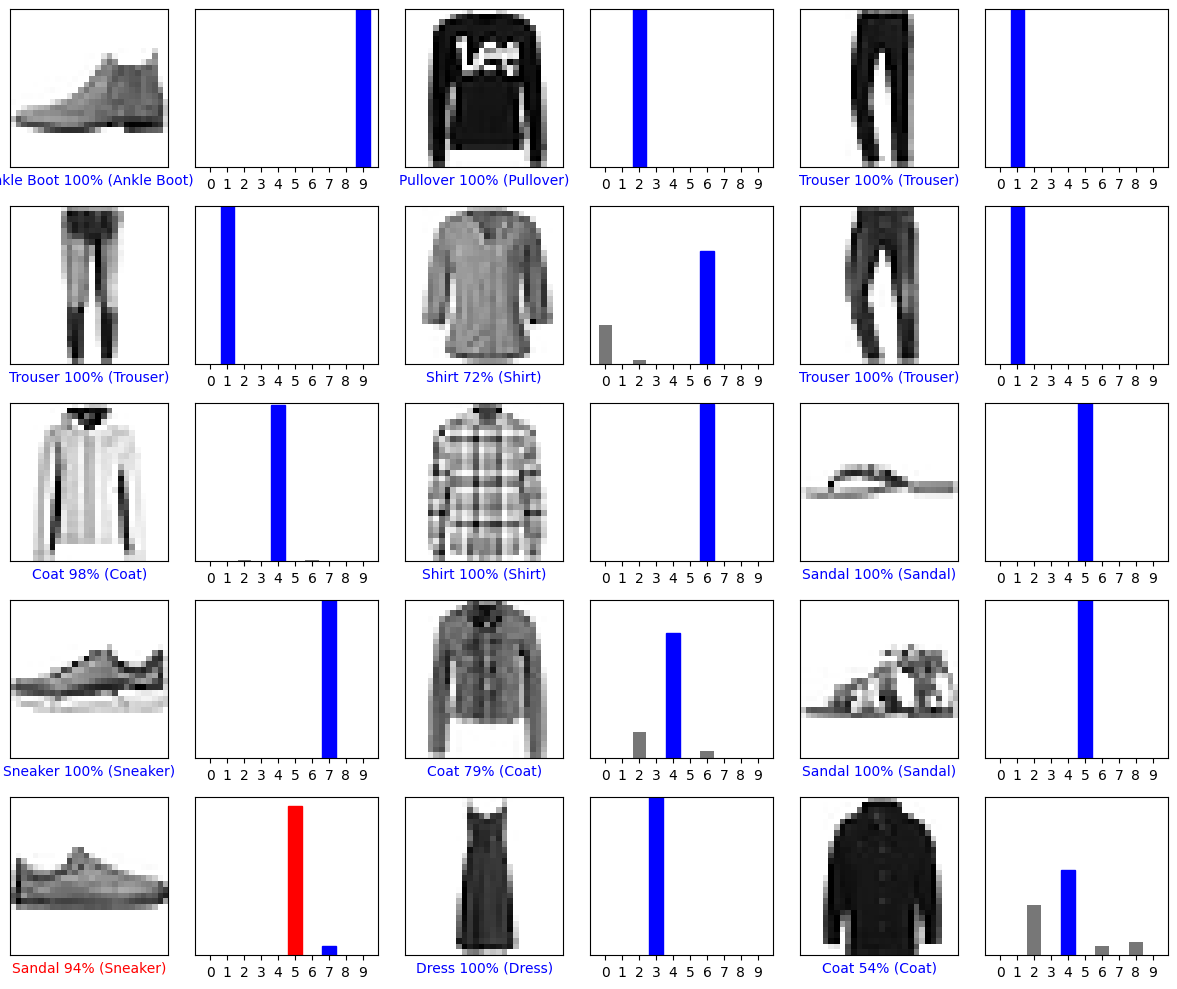

In [84]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, (i*2)+1)
    plot_image(i, predictions[i], test_labels[i], test_images[i])
    plt.subplot(num_rows, 2*num_cols, (i+1)*2)
    plot_value_array(i, predictions[i], test_labels[i])
plt.tight_layout()
plt.show()

In [85]:
img = test_images[1]
print(img.shape)

(28, 28)


In [86]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [87]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 16ms/step
[[7.7565028e-06 2.0957094e-15 9.9960834e-01 1.1336310e-09 2.9407087e-04
  1.0591223e-12 8.9790701e-05 1.5534245e-14 1.1746398e-09 1.2540416e-10]]


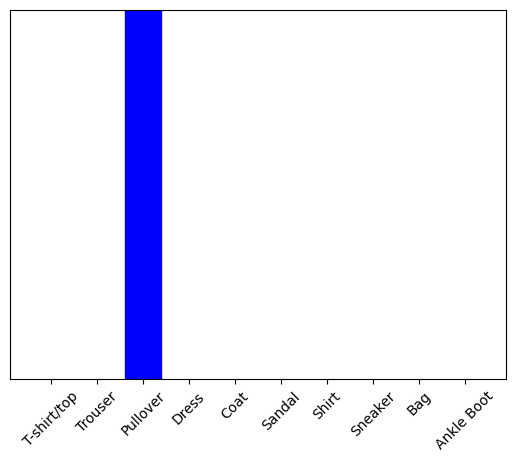

In [88]:
plot_value_array(1, predictions_single[0], test_labels[1])
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [89]:
np.argmax(predictions_single[0])

2

In [ ]:
predictions_single[0]

In [ ]:
predictions_single[1]